# **Using Machine Learning to Create New Data**

Importing the necessary libraries

In [1]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import scipy.stats
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit
from collections import Counter
%matplotlib inline 

In [2]:
from sklearn.ensemble import AdaBoostClassifier

In [3]:
from imblearn import under_sampling
from imblearn import over_sampling

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **1980 - Training the model**

Datasets about respondents drug usage and demographic variables acquired from the NLSY79 surveys

## Importing the dataset

In [5]:
df = pd.read_csv('C:\\Users\\adnaa\\Documents\\unistuff\\Year 3\\econ\\Economics Extended Essay\\resources\\nlsy79_freq.csv')

In [6]:
df.shape

(12686, 94)

Renaming the columns for readability

In [7]:
df.columns = ['welfare_80','welfare_88','f_health','m_health','id','live_14','memp','femp',
              'meduc','num_oldsib','age_oldsib','educ','sample_id','eth','sex','weeks_79','%weeks_79','age_80','esteem_80','mj_year_80','drug_year_80',
              'crime','wages_r_80','wages_s_80','other_person_80','parent_present','friend_present',
              'hm_present','misc_present','urban_80','smsa_80','resid_80','famsize_80','married_80','region_80',
              'totinc_80','emp_80','weeks_80','%weeks_80','hours_80','height','weight','afqt','weeks_81','%weeks_81','religious','alc_gt6_80','weeks_82','%weeks_82',
              'm_sex_age1st','f_sex_age1st','alc_age1st','weeks_83','%weeks_83','weeks_84','%weeks_84','weeks_85','%weeks_85','weeks_86','%weeks_86','esteem_87','weeks_87','%weeks_87',
              'alc_gt6_last30','alc_last30','alcoholics1','alc_rel1','alc_rel1_yrs','alcoholics2','alc_rel2','alc_rel2_yrs','mj_life','mj_recent','mj_last30',
              'coke_life','coke_recent','coke_last30','wages_r','wages_s','others_present?','famsize','totinc','region','married','age','emp','hours','weeks_88','%weeks_88',
              'urban','smsa','numchild','cesd',
               'smoke_age1st']

In [8]:
df.describe()

,welfare_80,welfare_88,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,sample_id,eth,sex,weeks_79,%weeks_79,age_80,esteem_80,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,resid_80,famsize_80,married_80,region_80,totinc_80,emp_80,weeks_80,%weeks_80,hours_80,height,weight,afqt,weeks_81,%weeks_81,religious,alc_gt6_80,weeks_82,%weeks_82,m_sex_age1st,f_sex_age1st,alc_age1st,weeks_83,%weeks_83,weeks_84,%weeks_84,weeks_85,%weeks_85,weeks_86,%weeks_86,esteem_87,weeks_87,%weeks_87,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,others_present?,famsize,totinc,region,married,age,emp,hours,weeks_88,%weeks_88,urban,smsa,numchild,cesd,smoke_age1st
count,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000
mean,177.679016,498.699432,-1.189421,-1.080088,6343.500000,20.406669,0.421961,-0.013795,10.025619,1.874429,17.143071,10.333044,8.174129,2.434179,1.495270,20.232146,2.507094,17.806795,20.896500,1.409980,0.254138,-0.111540,2115.945609,749.218114,0.122418,-3.011351,-2.628882,-3.623680,-3.800173,0.146145,0.652846,0.531688,3.682012,-0.013637,2.216617,13206.565111,0.126596,20.273530,0.428898,620.018288,496.920464,138.941116,39815.381917,25.351569,-0.260760,2.461375,-0.590178,27.267303,0.098061,4.175706,4.383730,12.465789,28.134479,0.013716,30.357244,-0.152530,29.511430,-0.616743,31.855983,-0.651742,18.150323,36.021835,-0.469888,-1.232382,2.151900,-0.473278,0.269667,15.170030,-2.336355,-1.371354,7.744837,0.604052,0.569683,-3.512770,-0.393820,-2.141731,-3.999685,10227.746886,5643.566294,-0.638814,1.643938,17908.656551,1.230884,0.569447,21.431893,-0.279048,1265.975642,40.198408,-0.364496,-0.405408,-0.054864,-0.127069,-1.105707,2.208103
std,1219.458157,3769.204395,2.159720,2.147142,3662.277092,16.518985,0.807447,1.932576,4.459149,2.523160,13.614419,2.711919,5.048088,0.749223,0.499997,24.768429,14.682150,5.330906,7.325406,2.751295,1.843388,1.081509,3775.854272,3075.008397,1.278576,2.034631,2.558650,1.647574,1.343210,1.740633,2.170304,6.629331,2.895707,1.174846,1.845057,14156.416216,1.460036,20.612304,7.832849,785.596204,112.339996,42.254061,29679.561498,22.402242,2.910698,2.306109,3.087278,22.679993,5.048632,9.879157,10.483555,8.334534,23.348415,3.875269,23.954913,2.812549,25.769182,3.254621,27.225043,4.120585,11.593409,31.125878,6.098521,3.127194,8.043566,2.139083,6.714109,36.215712,2.399806,6.170150,31.297282,3.125318,4.993460,2.150679,2.444407,3.960857,1.074666,11608.630465,11259.342980,2.097337,3.416077,20384.053694,3.045661,2.640790,12.350105,2.243199,1066.143363,35.498539,6.472772,2.335346,2.787774,2.471424,2.585689,9.927568
min,-4.000000,-4.000000,-4.000000,-4.

Seperating the dataset into the 1980 one

In [9]:
df1 = df.loc[:,['welfare_80','f_health','m_health','id','live_14','memp','femp',
         'meduc','num_oldsib','age_oldsib','educ','eth','sex','age_80','esteem_80','mj_year_80','drug_year_80','crime',
         'wages_r_80','wages_s_80','other_person_80','parent_present','friend_present',
         'hm_present','misc_present','urban_80','smsa_80','resid_80','famsize_80','married_80','region_80',
         'totinc_80','emp_80','hours_80','height','weight','afqt','religious','alc_gt6_80','m_sex_age1st','f_sex_age1st',
         'alc_age1st','alcoholics1','alc_rel1','alc_rel1_yrs','alcoholics2','alc_rel2','alc_rel2_yrs','cesd','smoke_age1st']]

In [10]:
df1.shape

(12686, 50)

In [11]:
df1.describe()

,welfare_80,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem_80,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,resid_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,height,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st
count,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000
mean,177.679016,-1.189421,-1.080088,6343.500000,20.406669,0.421961,-0.013795,10.025619,1.874429,17.143071,10.333044,2.434179,1.495270,17.806795,20.896500,1.409980,0.254138,-0.111540,2115.945609,749.218114,0.122418,-3.011351,-2.628882,-3.623680,-3.800173,0.146145,0.652846,0.531688,3.682012,-0.013637,2.216617,13206.565111,0.126596,620.018288,496.920464,138.941116,39815.381917,2.461375,-0.590178,4.175706,4.383730,12.465789,-0.473278,0.269667,15.170030,-2.336355,-1.371354,7.744837,-1.105707,2.208103
std,1219.458157,2.159720,2.147142,3662.277092,16.518985,0.807447,1.932576,4.459149,2.523160,13.614419,2.711919,0.749223,0.499997,5.330906,7.325406,2.751295,1.843388,1.081509,3775.854272,3075.008397,1.278576,2.034631,2.558650,1.647574,1.343210,1.740633,2.170304,6.629331,2.895707,1.174846,1.845057,14156.416216,1.460036,785.596204,112.339996,42.254061,29679.561498,2.306109,3.087278,9.879157,10.483555,8.334534,2.139083,6.714109,36.215712,2.399806,6.170150,31.297282,2.585689,9.927568
min,-4.000000,-4.000000,-4.000000,1.000000,-3.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,1.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,-4.000000,-4.000000,-4.000000,3172.250000,11.000000,0.000000,0.000000,9.000000,0.000000,-3.000000,9.000000,2.000000,1.000000,17.000000,19.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,-4.000000,2.000000,0.000000,2.000000,2000.000000,0.000000,-3.000000,504.000000,120.000000,13047.750000,1.000000,-4.000000,-4.000000,-4.000000,11.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-5.000000,-5.000000
50%,-4.000000,0.000000,0.000000,6343.500000,11.000000,1.000000,1.000000,12.000000,2.000000,22.000000,11.000000,3.000000,1.000000,19.000000,22.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,1.000000,-4.000000,4.000000,0.000000,3.000000,9000.000000,1.000000,225.000000,507.000000,140.000000,35479.500000,2.000000,0.000000,-4.000000,-4.000000,16.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000
75%,-4.000000,1.000000,1.000000,9514.750000,21.000000,1.000000,1.000000,12.000000,3.000000,26.000000,12.000000,3.000000,2.000000,21.000000,25.000000,4.000000,0.000000,0.000000,3000.000000,-4.000000,1.000000,-4.000000,-3.000000,-4.000000,-4.000000,1.000000,2.000000,11.000000,5.000000,0.000000,3.000000,20000.000000,1.000000,1108.000000,510.000000,160.000000,64190.750000,4.000000,2.000000,15.00

## Cleaning the Dataset and Feature Engineering

Dropping any missing 'non-interview' values (-5)

In [12]:
for y in df1.columns:
    for x in df1.index:
        if df1.loc[x,y] == -5 and y not in ['smoke_age1st','cesd']:
            df1.drop(x, axis=0, inplace=True)
df1.shape

(9835, 50)

Dropping all respondents who are under the age of 18

In [13]:
for x in df1.index:
    if df1.loc[x,'age_80'] < 18:
        df1.drop(x, axis=0, inplace=True)


Converting some 'valid skip' values (-4) to zeroes

In [14]:
for y in ['welfare_80','f_health','m_health','memp','femp','num_oldsib','age_oldsib','wages_s_80','parent_present','friend_present','hm_present','misc_present',
          'alc_gt6_80','m_sex_age1st','f_sex_age1st','alc_age1st','smoke_age1st']:
    for x in df1.index:
        if df1.loc[x,y] == -4:
            df1.loc[x,y] = 0

dropping unnecessary column

In [15]:
df1.drop(columns=['resid_80'], inplace=True)

Dropping others

In [16]:
for y in ['meduc','educ','afqt','urban_80','smsa_80']:
    for x in df1.index:
        if df1.loc[x,y] < 0:
            df1.drop(x, axis=0, inplace=True)

df1.describe()

,welfare_80,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem_80,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,height,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st
count,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000
mean,280.399231,0.275673,0.332967,5797.321252,19.396485,0.482519,0.748673,10.933553,1.900970,18.716273,11.463848,2.451949,1.542193,19.989566,22.360974,1.902435,0.574593,0.102508,3766.992678,1302.887791,0.358411,0.110562,0.465861,0.153213,0.062786,0.786015,1.372140,3.931539,0.273293,2.539996,14582.008054,0.559400,1011.628592,517.738239,146.784551,43428.497346,2.798645,1.068461,6.561779,8.466410,14.095735,0.495881,1.587955,20.286839,-1.738239,-0.495698,10.740619,-0.574410,4.847337
std,1497.002063,0.640229,0.523231,3428.374625,15.947548,0.576305,0.524383,3.222861,2.264116,12.553906,2.050471,0.738780,0.498262,1.504686,4.958047,2.494336,1.565216,0.310501,4426.748268,3952.471147,0.673861,0.569778,0.993330,0.875096,0.792387,0.410154,1.094947,2.281635,0.591186,0.998810,15096.706180,0.658226,820.674473,48.643774,33.084408,29370.656072,1.648458,1.615015,8.112592,8.891753,7.024476,0.520129,7.046187,39.076406,2.272521,6.651189,34.146773,2.285608,9.145300
min,-3.000000,-2.000000,-2.000000,2.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,2.000000,1.000000,1.000000,18.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,1.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-5.000000,-5.000000
25%,0.000000,0.000000,0.000000,2864.500000,11.000000,0.000000,1.000000,10.000000,0.000000,0.000000,10.000000,2.000000,1.000000,19.000000,19.000000,0.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,3179.500000,0.000000,274.500000,504.000000,125.000000,16854.500000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,5672.000000,11.000000,1.000000,1.000000,12.000000,1.000000,23.000000,12.000000,3.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,3.000000,10000.000000,1.000000,885.000000,507.000000,143.000000,40026.000000,2.000000,0.000000,0.000000,0.000000,17.000000,1.000000,1.000000,-3.000000,0.000000,-4.000000,-4.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,8590.000000,21.000000,1.000000,1.000000,12.000000,3.000000,27.000000,12.000000,3.000000,2.000000,21.000000,26.000000,4.000000,0.000000,0.000000,5800.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,5.000000,0.000000,3.000000,21200.000000,1.000000,1712.000000,510.000000,165.000000,68420.500000,4.000000,2.000000,16.000000,17.000000,18.000000,1.000000,5.000000,18.000000,0.000000,-4.000000,-4.000000,1.000000,15.000000
max,52020.000000,1.000000,1.000000,12686.000000,91.000000,1.000000,1

In [17]:
df1['mj_freq'] = np.where(df1['mj_year_80']>5,1,0)
df1['drug_freq'] = np.where(df1['drug_year_80']>5,1,0)

In [18]:
from collections import Counter
print(Counter(df1['drug_freq']))

Counter({0: 5372, 1: 91})


Creating new variables for Missing Non-labour income and non-labour income

In [19]:
df1['missing_noninc'] = np.where(df1['totinc_80']<=0,1,0)

In [20]:
def nonlinc(c):
    nonlinc = 1
    if c['missing_noninc'] == 0:    
        nonlinc = c['totinc_80'] - (c['wages_r_80'])
    else:
        nonlinc = 0
    return nonlinc
    
df1['nonlinc'] = df1.apply(nonlinc, axis=1)

Dropping missing values and converting (-4) to zeroes for alcoholic relative variables i.e. if there is no alcoholic relative =0

In [21]:
for y in ['alc_rel1','alcoholics2','alc_rel2']:
    for x in df1.index:
        if df1.loc[x,y] == -4:
            df1.loc[x,y] = 0
        elif df1.loc[x,y] < 0 and df1.loc[x,y] != -4:
            df1.drop(x, axis=0, inplace=True)
for y in ['alc_rel1_yrs','alc_rel2_yrs']:
    for x in df1.index:
        if df1.loc[x,y] == 0:
            df1.loc[x,y] = 1
        elif df1.loc[x,y] == 96 or df1.loc[x,y] == -4:
            df1.loc[x,y] = 0
        elif df1.loc[x,y] < 0 and df1.loc[x,y] != -4:
            df1.drop(x, axis=0, inplace=True)

In [22]:
df1.shape

(5417, 53)

Defining whether alcoholic relative is a 1st or 2nd relative

In [23]:
df1['alc_rel1_1st'] = np.nan
df1['alc_rel1_2nd'] = np.nan
df1['alc_rel2_1st'] = np.nan
df1['alc_rel2_2nd'] = np.nan

In [24]:
for x in df1.index:
    if df1.loc[x,'alc_rel1'] in [1,2,3,4,5,6,7,8,20,21]:
        df1.loc[x,'alc_rel1_1st'] = 1
    elif df1.loc[x,'alc_rel1'] in [9,10,11,12,13,14,15,16,17,18,19]:
        df1.loc[x, 'alc_rel1_2nd'] = 1
        
for x in df1.index:
    if df1.loc[x,'alc_rel2'] in [1,2,3,4,5,6,7,8,20,21]:
        df1.loc[x,'alc_rel2_1st'] = 1
    elif df1.loc[x,'alc_rel2'] in [9,10,11,12,13,14,15,16,17,18,19]:
        df1.loc[x, 'alc_rel2_2nd'] = 1

In [25]:
df1['alc_rel1_1st'] = df1['alc_rel1_1st'].fillna(0)
df1['alc_rel1_2nd'] = df1['alc_rel1_2nd'].fillna(0)
df1['alc_rel2_1st'] = df1['alc_rel2_1st'].fillna(0)
df1['alc_rel2_2nd'] = df1['alc_rel2_2nd'].fillna(0)

In [26]:
for x in df1.index:
    if df1.loc[x,'alcoholics1'] < 0:
        df1.drop(x, axis=0, inplace=True)
        
df1.shape

(5411, 57)

Creating new variables for years spent living with an alcoholic relative

In [27]:
def years_alcrel1_1st(c):
    years = c['alc_rel1_1st'] * c['alc_rel1_yrs']
    return years
def years_alcrel2_1st(c):
    years = c['alc_rel2_1st'] * c['alc_rel2_yrs']
    return years
df1['years_alcrel1'] = df1.apply(years_alcrel1_1st, axis=1)
df1['years_alcrel2'] = df1.apply(years_alcrel2_1st, axis=1)

Creating variable for whether respondent lived with parents or not at age 14

In [28]:
df1['live_parents'] = np.where(df1['live_14']==11,1,0)
for x in df1.index:
    if df1.loc[x,'live_14'] < 0:
        df1.drop(x, axis=0, inplace=True)

df1.describe()

,welfare_80,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem_80,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,height,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st,mj_freq,drug_freq,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents
count,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000,5406.000000
mean,280.248058,0.274695,0.332408,5802.799852,19.399926,0.485202,0.751202,10.936922,1.897521,18.699038,11.470403,2.451905,1.542915,19.991306,22.364780,1.900296,0.573807,0.101739,3764.710322,1302.789493,0.358491,0.110248,0.466149,0.153718,0.061783,0.785054,1.373104,3.927488,0.273030,2.539771,14616.126711,0.559563,1012.183315,517.664632,146.714576,43509.410100,2.800222,1.066963,6.555864,8.479837,14.113393,0.499445,3.562708,2.636330,0.245468,2.490936,0.668331,-0.577876,4.844432,0.166482,0.016833,0.185350,11450.834998,0.291713,0.207732,0.103219,0.142249,2.529042,0.611358,0.719016
std,1500.858545,0.639883,0.523572,3428.824684,15.919846,0.570362,0.515507,3.222880,2.263626,12.560480,2.052357,0.739402,0.498201,1.505745,4.967399,2.494592,1.565945,0.309589,4421.995891,3958.694244,0.673984,0.569709,0.993532,0.875957,0.790012,0.410823,1.095483,2.276273,0.591805,0.999255,15129.800661,0.659706,820.384807,48.706596,33.098548,29354.997462,1.646471,1.612380,8.113175,8.897289,7.015636,0.500046,5.602171,5.672059,0.430404,5.085559,2.921429,2.285890,9.143953,0.372547,0.128658,0.388617,14168.095697,0.454593,0.405722,0.304272,0.349338,5.636884,2.877597,0.449521
min,-3.000000,-2.000000,-2.000000,2.000000,11.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,2.000000,1.000000,1.000000,18.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,1.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,-39500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2865.250000,11.000000,0.000000,1.000000,10.000000,0.000000,0.000000,10.000000,2.000000,1.000000,19.000000,19.000000,0.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,3200.000000,0.000000,280.000000,504.000000,125.000000,17026.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,5677.000000,11.000000,1.000000,1.000000,12.000000,1.000000,23.000000,12.000000,3.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,3.000000,10000.000000,1.000000,885.000000,507.000000,142.000000,40135.000000,2.000000,0

Dropping missing values

In [29]:
for y in df1.columns:
    for x in df1.index:
        if df1.loc[x,y] < 0 and y not in ['cesd','smoke_age1st']:
            df1.drop(x, axis=0, inplace=True)
            
df1.describe()

,welfare_80,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem_80,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,height,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st,mj_freq,drug_freq,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,259.936133,0.353855,0.348101,5803.485903,18.105581,0.515535,0.801208,11.076237,1.996548,19.410529,11.547468,2.488780,1.560414,20.033947,22.846951,2.110472,0.714327,0.100690,3850.912831,1490.344937,0.425489,0.166571,0.529344,0.209724,0.107020,0.786824,1.368815,3.740506,0.281358,2.549770,18274.680667,0.619102,1069.117952,518.926064,147.151899,45953.455121,2.822497,1.081128,6.530207,8.794591,14.208573,0.504603,3.590334,2.755178,0.243383,2.431530,0.651899,-0.663982,4.638665,0.182394,0.019563,0.002877,14426.286536,0.298044,0.206559,0.103855,0.139528,2.666571,0.607595,0.752301
std,1273.290764,0.478234,0.476437,3433.553241,14.418316,0.499831,0.399148,3.199136,2.064427,12.029714,1.701051,0.734076,0.496408,1.493583,4.040820,2.440166,1.529313,0.300962,4073.869618,4138.278265,0.494488,0.372646,0.882444,0.765085,0.645558,0.409610,1.086103,2.199930,0.588824,0.982786,14947.866649,0.485677,809.739954,37.259973,31.236594,29359.895336,1.603367,1.604591,8.096217,8.881463,6.934758,0.500051,5.642711,5.816243,0.429186,5.010341,2.857216,2.317995,9.111747,0.386224,0.138512,0.053567,14552.100151,0.457465,0.404895,0.305116,0.346547,5.798997,2.840851,0.431738
min,0.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,405.000000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2877.750000,11.000000,0.000000,1.000000,10.000000,1.000000,18.000000,11.000000,2.000000,1.000000,19.000000,20.000000,0.000000,0.000000,0.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,7000.000000,0.000000,390.000000,504.000000,125.000000,19761.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3428.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,5611.500000,11.000000,1.000000,1.000000,12.000000,1.000000,23.000000,12.000000,3.000000,2.000000,20.000000,23.000000,1.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,3.000000,14000.000000,1.000000,963.000000,507.000000,140.000000,43888.500000,2.000000,0.000000,0.000000,12.000000,

Creating variable for missing values in `cesd` and `smoke_age1st` to avoid dropping a considerable portion of the dataset

In [30]:
df1['missing_cesd'] = np.where(df1['cesd']==-5,1,0)
df1['missing_smoke_age1st'] = np.where(df1['smoke_age1st']==-5,1,0)

In [31]:
df1.describe()

,welfare_80,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem_80,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,height,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st,mj_freq,drug_freq,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,missing_cesd,missing_smoke_age1st
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,259.936133,0.353855,0.348101,5803.485903,18.105581,0.515535,0.801208,11.076237,1.996548,19.410529,11.547468,2.488780,1.560414,20.033947,22.846951,2.110472,0.714327,0.100690,3850.912831,1490.344937,0.425489,0.166571,0.529344,0.209724,0.107020,0.786824,1.368815,3.740506,0.281358,2.549770,18274.680667,0.619102,1069.117952,518.926064,147.151899,45953.455121,2.822497,1.081128,6.530207,8.794591,14.208573,0.504603,3.590334,2.755178,0.243383,2.431530,0.651899,-0.663982,4.638665,0.182394,0.019563,0.002877,14426.286536,0.298044,0.206559,0.103855,0.139528,2.666571,0.607595,0.752301,0.204545,0.204545
std,1273.290764,0.478234,0.476437,3433.553241,14.418316,0.499831,0.399148,3.199136,2.064427,12.029714,1.701051,0.734076,0.496408,1.493583,4.040820,2.440166,1.529313,0.300962,4073.869618,4138.278265,0.494488,0.372646,0.882444,0.765085,0.645558,0.409610,1.086103,2.199930,0.588824,0.982786,14947.866649,0.485677,809.739954,37.259973,31.236594,29359.895336,1.603367,1.604591,8.096217,8.881463,6.934758,0.500051,5.642711,5.816243,0.429186,5.010341,2.857216,2.317995,9.111747,0.386224,0.138512,0.053567,14552.100151,0.457465,0.404895,0.305116,0.346547,5.798997,2.840851,0.431738,0.403427,0.403427
min,0.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,405.000000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2877.750000,11.000000,0.000000,1.000000,10.000000,1.000000,18.000000,11.000000,2.000000,1.000000,19.000000,20.000000,0.000000,0.000000,0.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,7000.000000,0.000000,390.000000,504.000000,125.000000,19761.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3428.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,5611.500000,11.000000,1.000000,1.000000,12.000000,1.000000,23.000000,12.000000,3.000000,2.000000,20.000000,23.000000,1.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.

Dropping actual missing values

In [32]:
for x in df1.index:
    if df1.loc[x,'cesd'] < 0 and df1.loc[x,'missing_cesd'] != 1:
        df1.drop(x, axis=0, inplace=True)
for x in df1.index:
    if df1.loc[x,'smoke_age1st'] < 0 and df1.loc[x,'missing_smoke_age1st'] != 1:
        df1.drop(x, axis=0, inplace=True)
df1.shape

(3412, 62)

Creating variable for whether any drug was consumed in past year

In [33]:
df1['mj_year'] = np.where(df1['mj_year_80']>0,1,0)
df1['drug_year'] = np.where(df1['drug_year_80']>0,1,0)

In [34]:
df1.columns

Index(['welfare_80', 'f_health', 'm_health', 'id', 'live_14', 'memp', 'femp',
       'meduc', 'num_oldsib', 'age_oldsib', 'educ', 'eth', 'sex', 'age_80',
       'esteem_80', 'mj_year_80', 'drug_year_80', 'crime', 'wages_r_80',
       'wages_s_80', 'other_person_80', 'parent_present', 'friend_present',
       'hm_present', 'misc_present', 'urban_80', 'smsa_80', 'famsize_80',
       'married_80', 'region_80', 'totinc_80', 'emp_80', 'hours_80', 'height',
       'weight', 'afqt', 'religious', 'alc_gt6_80', 'm_sex_age1st',
       'f_sex_age1st', 'alc_age1st', 'alcoholics1', 'alc_rel1', 'alc_rel1_yrs',
       'alcoholics2', 'alc_rel2', 'alc_rel2_yrs', 'cesd', 'smoke_age1st',
       'mj_freq', 'drug_freq', 'missing_noninc', 'nonlinc', 'alc_rel1_1st',
       'alc_rel1_2nd', 'alc_rel2_1st', 'alc_rel2_2nd', 'years_alcrel1',
       'years_alcrel2', 'live_parents', 'missing_cesd', 'missing_smoke_age1st',
       'mj_year', 'drug_year'],
      dtype='object')

In [35]:
df1['alc_gt6_80'].unique()

array([0, 2, 3, 4, 1, 5, 6], dtype=int64)

In [36]:
df1['alc_gt6_freq'] = np.where(df1['alc_gt6_80']>5,1,0)

In [37]:
def cesd_mod(c):
    if c['cesd'] > 0 and c['cesd'] < 3:
        return 1
    else:
        return 0
df1['cesd_mod'] = df1.apply(cesd_mod, axis=1)
df1['cesd_freq'] = np.where(df1['cesd']>2,1,0)

In [38]:
def height_in(c):
    num = []
    for x in str(int(c['height'])):
        num.append(str(x))
    ft = int(num[0])
    inch = int("".join(num[1:]))
    height = (12*ft)+inch
    return height

df1['height_in'] = df1.apply(height_in,axis=1)
    

In [39]:
df1.drop(columns=['height'], inplace=True)
df1.rename(columns={'height_in':'height'}, inplace=True)

In [40]:
df1.rename(columns={'welfare_80':'welfare','esteem_80':'esteem'}, inplace=True)

In [41]:
df1.describe()

,welfare,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st,mj_freq,drug_freq,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,missing_cesd,missing_smoke_age1st,mj_year,drug_year,alc_gt6_freq,cesd_mod,cesd_freq,height
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,259.636577,0.352579,0.345838,5821.331770,18.123974,0.514947,0.800996,11.072098,2.004396,19.434056,11.548945,2.490328,1.562134,20.033998,22.858441,2.105510,0.712485,0.100821,3857.036928,1507.455744,0.425557,0.166178,0.528722,0.209261,0.105510,0.787808,1.369578,3.736811,0.283998,2.549824,18219.401817,0.619871,1069.139508,147.082356,46003.960141,2.822685,1.073857,6.507620,8.815944,14.189332,0.504689,3.575909,2.773447,0.245018,2.458382,0.654748,-0.678781,4.729484,0.182298,0.019637,0.002931,14364.930832,0.298945,0.205744,0.103458,0.141559,2.684642,0.609613,0.750879,0.208382,0.208382,0.515533,0.224502,0.041618,0.203400,0.035756,66.851700
std,1275.843063,0.477843,0.475710,3439.063956,14.425016,0.499850,0.399309,3.194206,2.070647,12.027772,1.704911,0.733397,0.496197,1.491897,4.034541,2.439657,1.526944,0.301135,4079.635866,4164.483692,0.494500,0.372295,0.882114,0.764307,0.641115,0.408920,1.084655,2.192553,0.591597,0.981585,14867.189193,0.485489,810.881894,31.207451,29340.066697,1.601242,1.596628,8.092778,8.882477,6.953835,0.500051,5.622580,5.840594,0.430161,5.039367,2.863825,2.330878,9.155027,0.386146,0.138768,0.054066,14463.584889,0.457863,0.404304,0.304601,0.348649,5.822818,2.847229,0.432567,0.406211,0.406211,0.499832,0.417315,0.199744,0.402586,0.185709,4.013279
min,0.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
25%,0.000000,0.000000,0.000000,2895.250000,11.000000,0.000000,1.000000,10.000000,1.000000,18.000000,11.000000,2.000000,1.000000,19.000000,20.000000,0.000000,0.000000,0.000000,796.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,7000.000000,0.000000,390.000000,125.000000,19886.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3413.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

## Performing ML

Defining independent variables for machine-learning process

In [42]:
X1_col = ['mj_year', 'welfare','esteem',
       'age_oldsib','crime',
       'm_sex_age1st', 'f_sex_age1st', 'alc_gt6_freq',
       'cesd_mod','cesd_freq', 'smoke_age1st', 'missing_noninc', 'nonlinc', 
       'missing_cesd', 'missing_smoke_age1st']
X2_col = ['drug_year', 'welfare','esteem',
       'age_oldsib','crime',
       'm_sex_age1st', 'f_sex_age1st', 'alc_gt6_freq',
       'cesd_mod','cesd_freq', 'smoke_age1st', 'missing_noninc', 'nonlinc', 
       'missing_cesd', 'missing_smoke_age1st']

In [43]:
X1 = df1[X1_col]

y1 = df1['mj_freq']

X2 = df1[X2_col]

y2 = df1['drug_freq']

Standard scaling X variables

In [44]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))

In [45]:
print(Counter(y1))
print(Counter(y2))

Counter({0: 2790, 1: 622})
Counter({0: 3345, 1: 67})


Splitting into training and testing sets

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=118)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=118)

In [47]:
print(Counter(y1_train))
print(Counter(y2_train))

Counter({0: 2094, 1: 465})
Counter({0: 2506, 1: 53})


Since we have an imbalanced data we incorporate oversampling (SMOTE) and undersampling (One Sided Selection) techniques to increase the number of our minority output for a better model

In [48]:
oversample = over_sampling.SMOTE(random_state=42, sampling_strategy=0.5)
X1_train, y1_train = oversample.fit_resample(X1_train, y1_train)
X2_train, y2_train = oversample.fit_resample(X2_train, y2_train)

In [49]:
print(Counter(y1_train))
print(Counter(y2_train))

Counter({0: 2094, 1: 1047})
Counter({0: 2506, 1: 1253})


In [50]:
undersample = under_sampling.OneSidedSelection(n_neighbors=1, n_seeds_S=200, random_state=3)
X1_train, y1_train = undersample.fit_resample(X1_train, y1_train)
X2_train, y2_train = undersample.fit_resample(X2_train, y2_train)

In [51]:
print(Counter(y1_train))
print(Counter(y2_train))

Counter({1: 1047, 0: 877})
Counter({1: 1253, 0: 453})


Creating a function to plot confusion matrices to evaluate our model

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### **Random Forest**

In [53]:
def evaluate(model, test_features, test_labels, threshold, title):
    yhat_probs = model.predict_proba(test_features)
    yhat = (yhat_probs [:,1] >= threshold).astype('int')
    cnf_matrix_rf = confusion_matrix(test_labels, yhat, labels=[0,1])
    np.set_printoptions(precision=2)    
    print (classification_report(test_labels, yhat))
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix_rf, classes=['0','1'],normalize= True,  title='Confusion matrix')
    plt.savefig(title+'.png', bbox_inches='tight')

#### MJ prediction

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       696
           1       0.44      0.78      0.56       157

    accuracy                           0.77       853
   macro avg       0.69      0.78      0.70       853
weighted avg       0.85      0.77      0.80       853

Normalized confusion matrix
[[0.77 0.23]
 [0.22 0.78]]


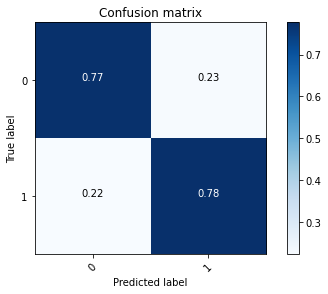

In [175]:
base_rf1 = RandomForestClassifier(n_estimators=500, random_state=121, max_depth=2)
base_rf1.fit(X1_train,y1_train)
evaluate(base_rf1,X1_test,y1_test,0.545,'rf_mj_train')

#### Drug prediction

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       839
           1       0.08      0.86      0.14        14

    accuracy                           0.83       853
   macro avg       0.54      0.84      0.53       853
weighted avg       0.98      0.83      0.89       853

Normalized confusion matrix
[[0.83 0.17]
 [0.14 0.86]]


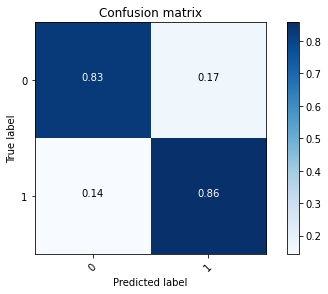

In [117]:
base_rf2 = RandomForestClassifier(n_estimators=500, random_state=121, max_depth=2)
base_rf2.fit(X2_train,y2_train)
evaluate(base_rf2,X2_test,y2_test,0.6,'rf_drug_train')

The base random forest provides better results for marijuana use prediction but the Best one is better for drug use prediction

### **K-Nearest Neighbour**

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       696
           1       0.38      0.71      0.50       157

    accuracy                           0.74       853
   macro avg       0.65      0.73      0.66       853
weighted avg       0.82      0.74      0.76       853

Normalized confusion matrix
[[0.74 0.26]
 [0.29 0.71]]


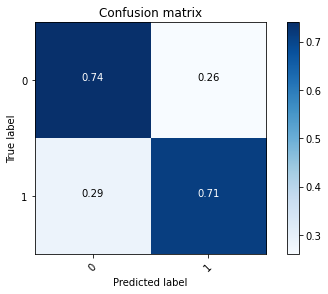

In [54]:
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X1_train, y1_train)
evaluate(neigh, X1_test, y1_test, 0.55, 'knn_mj_train')

In [57]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       839
           1       0.06      0.86      0.11        14

    accuracy                           0.77       853
   macro avg       0.53      0.81      0.49       853
weighted avg       0.98      0.77      0.86       853

Normalized confusion matrix
[[0.77 0.23]
 [0.14 0.86]]


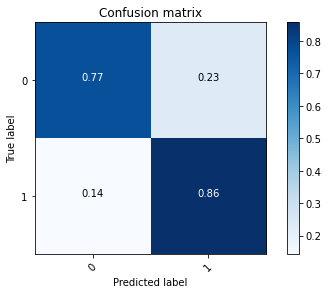

In [56]:
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X2_train, y2_train)
evaluate(neigh, X2_test, y2_test, 0.4, 'knn_drug_train')

### **SVM**

              precision    recall  f1-score   support

           0       1.00      0.59      0.75       696
           1       0.36      1.00      0.53       157

    accuracy                           0.67       853
   macro avg       0.68      0.80      0.64       853
weighted avg       0.88      0.67      0.71       853

Normalized confusion matrix
[[0.59 0.41]
 [0.   1.  ]]


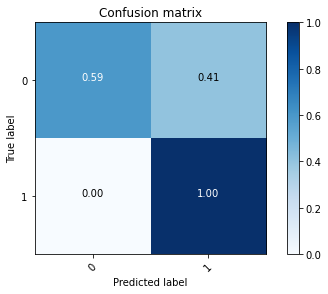

In [60]:
vector = svm.SVC(kernel='linear', random_state=121, probability=True)
vector.fit(X1_train, y1_train)
evaluate(vector, X1_test, y1_test, 0.6, 'svm_mj_train')

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       839
           1       0.06      0.79      0.11        14

    accuracy                           0.80       853
   macro avg       0.53      0.79      0.50       853
weighted avg       0.98      0.80      0.87       853

Normalized confusion matrix
[[0.8  0.2 ]
 [0.21 0.79]]


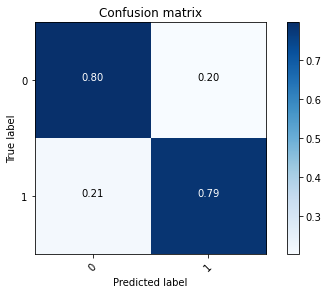

In [61]:
vector.fit(X2_train, y2_train)
evaluate(vector, X2_test, y2_test, 0.15, 'svm_drug_train')

### **AdaBoost Classifier**

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       696
           1       0.44      0.74      0.55       157

    accuracy                           0.78       853
   macro avg       0.68      0.76      0.70       853
weighted avg       0.84      0.78      0.80       853

Normalized confusion matrix
[[0.78 0.22]
 [0.26 0.74]]


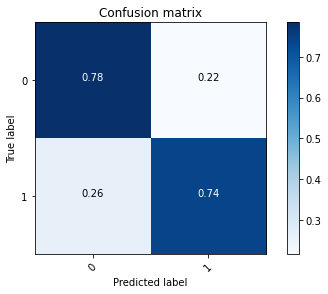

In [133]:
abc1 = AdaBoostClassifier(n_estimators=100,learning_rate=0.05, random_state=121)
abc1.fit(X1_train, y1_train)
evaluate(abc1, X1_test, y1_test, 0.515, 'abc_mj_train')

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       839
           1       0.08      0.86      0.14        14

    accuracy                           0.83       853
   macro avg       0.54      0.84      0.52       853
weighted avg       0.98      0.83      0.89       853

Normalized confusion matrix
[[0.83 0.17]
 [0.14 0.86]]


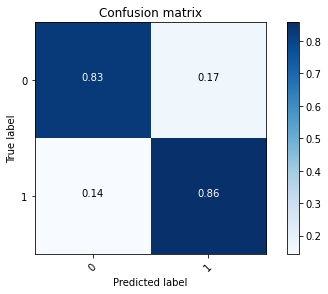

In [179]:
abc2 = AdaBoostClassifier(n_estimators=100,learning_rate=0.05, random_state=121)
abc2.fit(X2_train, y2_train)
evaluate(abc2, X2_test, y2_test, 0.495, 'abc_drug_train')

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      2790
           1       0.44      0.79      0.57       622

    accuracy                           0.78      3412
   macro avg       0.69      0.79      0.71      3412
weighted avg       0.85      0.78      0.80      3412

Normalized confusion matrix
[[0.78 0.22]
 [0.21 0.79]]


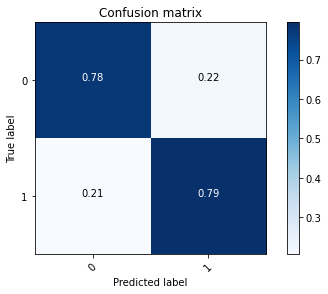

In [63]:
abc1.fit(X1, y1)
evaluate(abc1, X1, y1, 0.46)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3345
           1       0.14      0.91      0.25        67

    accuracy                           0.89      3412
   macro avg       0.57      0.90      0.59      3412
weighted avg       0.98      0.89      0.93      3412

Normalized confusion matrix
[[0.89 0.11]
 [0.09 0.91]]


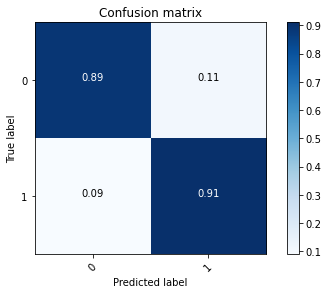

In [64]:
abc2.fit(X2, y2)
evaluate(abc2, X2, y2, 0.37)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2790
           1       0.43      0.78      0.56       622

    accuracy                           0.77      3412
   macro avg       0.69      0.78      0.70      3412
weighted avg       0.85      0.77      0.80      3412

Normalized confusion matrix
[[0.77 0.23]
 [0.22 0.78]]


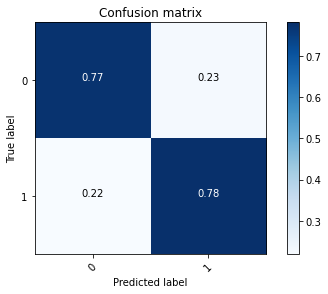

In [65]:
base_rf1.fit(X1,y1)
evaluate(base_rf1, X1, y1, 0.23)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3345
           1       0.13      0.90      0.22        67

    accuracy                           0.88      3412
   macro avg       0.56      0.89      0.58      3412
weighted avg       0.98      0.88      0.92      3412

Normalized confusion matrix
[[0.88 0.12]
 [0.1  0.9 ]]


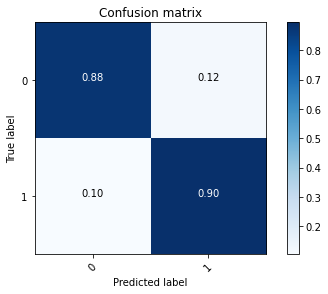

In [66]:
base_rf2.fit(X2,y2)
evaluate(base_rf2, X2, y2, 0.0415)

Our AdaBoost Classifier is the best performing model overall which is what we will utilize to predict the values in the 1988 dataset

In [67]:
feature_importances=pd.DataFrame({'features':X1_col,'feature_importance':base_rf1.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
0,mj_year,0.410576
4,crime,0.194356
5,m_sex_age1st,0.115138
10,smoke_age1st,0.075341
7,alc_gt6_freq,0.066446
6,f_sex_age1st,0.061839
12,nonlinc,0.031998
3,age_oldsib,0.015429
13,missing_cesd,0.011092
14,missing_smoke_age1st,0.009273


## **1988 dataset**

In [68]:
df.columns

Index(['welfare_80', 'welfare_88', 'f_health', 'm_health', 'id', 'live_14',
       'memp', 'femp', 'meduc', 'num_oldsib', 'age_oldsib', 'educ',
       'sample_id', 'eth', 'sex', 'weeks_79', '%weeks_79', 'age_80',
       'esteem_80', 'mj_year_80', 'drug_year_80', 'crime', 'wages_r_80',
       'wages_s_80', 'other_person_80', 'parent_present', 'friend_present',
       'hm_present', 'misc_present', 'urban_80', 'smsa_80', 'resid_80',
       'famsize_80', 'married_80', 'region_80', 'totinc_80', 'emp_80',
       'weeks_80', '%weeks_80', 'hours_80', 'height', 'weight', 'afqt',
       'weeks_81', '%weeks_81', 'religious', 'alc_gt6_80', 'weeks_82',
       '%weeks_82', 'm_sex_age1st', 'f_sex_age1st', 'alc_age1st', 'weeks_83',
       '%weeks_83', 'weeks_84', '%weeks_84', 'weeks_85', '%weeks_85',
       'weeks_86', '%weeks_86', 'esteem_87', 'weeks_87', '%weeks_87',
       'alc_gt6_last30', 'alc_last30', 'alcoholics1', 'alc_rel1',
       'alc_rel1_yrs', 'alcoholics2', 'alc_rel2', 'alc_rel2_yrs', 'm

Defining our 1988 dataset

In [69]:
df2 = df.loc[:,['welfare_88', 'f_health', 'm_health', 'id', 'live_14', 'memp', 'femp',
                'meduc', 'num_oldsib', 'age_oldsib', 'educ', 'eth', 'sex','esteem_87',
                'crime','height', 'weight','afqt', 'religious', 'm_sex_age1st', 'f_sex_age1st','alc_age1st', 'alc_gt6_last30', 
                'alc_last30', 'alcoholics1', 'alc_rel1','alc_rel1_yrs', 'alcoholics2', 'alc_rel2', 'alc_rel2_yrs', 'mj_life',
                'mj_recent', 'mj_last30', 'coke_life', 'coke_recent', 'coke_last30','wages_r', 'wages_s', 'others_present?', 'famsize', 
                'totinc', 'region','married', 'age', 'emp', 'hours', 'urban', 'smsa', 'numchild', 'cesd','smoke_age1st','weeks_79','%weeks_79',
                'weeks_80','%weeks_80','weeks_81','%weeks_81','weeks_82','%weeks_82','weeks_83','%weeks_83','weeks_84','%weeks_84','weeks_85',
                '%weeks_85','weeks_86','%weeks_86','weeks_87','%weeks_87','weeks_88','%weeks_88']]

## Cleaning the Dataset and Feature Engineering

Dropping and missing non-interview values (-5)

In [70]:
for y in df2.columns:
    for x in df2.index:
        if df2.loc[x,y] == -5 and y not in ['smoke_age1st','cesd']:
            df2.drop(x, axis=0, inplace=True)
df2.shape

(9240, 71)

Converting 'valid skip' (-4) values to zeroes where valid

In [71]:
for y in ['welfare_88','f_health','m_health','memp','femp','num_oldsib','age_oldsib','wages_s',
          'm_sex_age1st','f_sex_age1st','alc_age1st','smoke_age1st','alc_gt6_last30','alc_last30','weeks_79','%weeks_79',
          'weeks_80','%weeks_80','weeks_81','%weeks_81','weeks_82','%weeks_82','weeks_83','%weeks_83','weeks_84','%weeks_84','weeks_85',
          '%weeks_85','weeks_86','%weeks_86','weeks_87','%weeks_87','weeks_88','%weeks_88']:
    for x in df2.index:
        if df2.loc[x,y] == -4:
            df2.loc[x,y] = 0

Dropping others

In [72]:
for y in ['meduc','educ','afqt','urban','smsa']:
    for x in df2.index:
        if df2.loc[x,y] < 0:
            df2.drop(x, axis=0, inplace=True)

df2.describe()

,welfare_88,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem_87,crime,height,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,others_present?,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,weeks_79,%weeks_79,weeks_80,%weeks_80,weeks_81,%weeks_81,weeks_82,%weeks_82,weeks_83,%weeks_83,weeks_84,%weeks_84,weeks_85,%weeks_85,weeks_86,%weeks_86,weeks_87,%weeks_87,weeks_88,%weeks_88
count,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000
mean,601.730606,0.270932,0.335556,5773.455315,20.108732,0.499808,0.712912,10.851007,1.974227,17.913066,10.388255,2.427619,1.533145,23.135787,0.093345,516.640851,143.787665,42642.040005,2.914092,6.198743,7.535966,13.276830,0.878574,4.991409,0.489293,1.479805,19.876523,-1.770612,-0.617259,10.227722,1.793050,1.807796,-3.218490,0.571099,-1.579305,-3.802026,12927.945634,7225.993974,0.246570,3.063598,22366.693550,2.638287,1.744454,26.988845,0.732402,1586.792409,0.787024,1.409027,0.905501,-0.429927,5.118220,22.461469,3.442364,23.425567,1.039108,27.786511,0.225926,29.902680,0.317477,29.990383,0.160405,33.059623,0.053468,35.387870,0.035646,39.480703,0.104885,44.855366,0.395564,48.933453,0.533915
std,4472.367202,0.660749,0.529321,3382.195616,16.523588,0.575171,0.573883,3.154825,2.344574,12.115219,2.029608,0.744725,0.498932,5.035055,0.293567,48.375952,31.734751,29016.294548,1.703926,7.899763,8.653630,7.299683,1.506165,6.968736,0.522740,6.975745,38.835954,2.267409,6.543446,33.648618,1.903816,4.717308,2.223291,1.294648,4.088228,1.027721,11624.069836,12317.533958,0.622198,1.678984,20831.081602,0.965592,0.686373,2.261048,0.588916,955.006540,0.409437,1.002255,1.133631,2.167323,9.079294,24.386781,14.744337,19.966163,7.849451,20.704666,2.158918,20.818255,4.913955,20.775675,3.393118,20.890300,1.937425,20.324773,1.464555,21.189762,2.976272,23.247944,5.660352,24.008950,6.244349
min,-3.000000,-2.000000,-2.000000,6.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,0.000000,1.000000,1.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-3.000000,-4.000000,-4.000000,-3.000000,-4.000000,-4.000000,-3.000000,-3.000000,-3.000000,1.000000,-3.000000,1.000000,-3.000000,23.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2900.500000,11.000000,0.000000,0.000000,9.000000,0.000000,0.000000,9.000000,2.000000,1.000000,20.000000,0.000000,504.000000,121.000000,16572.000000,2.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,2600.000000,0.000000,0.000000,2.000000,5818.000000,2.000000,1.000000,25.000000,1.000000,840

Creating missing nonlabour income and non-labour income variables to not lose a significant portion of our dataset

In [73]:
df2['missing_noninc'] = np.where(df2['totinc']<=0,1,0)

In [74]:
def nonlinc(c):
    nonlinc = 0
    if c['missing_noninc'] == 0:    
        nonlinc = c['totinc'] - (c['wages_r'])
    else:
        nonlinc = 0
    return nonlinc
    
df2['nonlinc'] = df2.apply(nonlinc, axis=1)

Cleaning alcoholic relative variables

In [75]:
for y in ['alc_rel1','alcoholics2','alc_rel2']:
    for x in df2.index:
        if df2.loc[x,y] == -4:
            df2.loc[x,y] = 0
        elif df2.loc[x,y] < 0 and df2.loc[x,y] != -4:
            df2.drop(x, axis=0, inplace=True)
for y in ['alc_rel1_yrs','alc_rel2_yrs']:
    for x in df2.index:
        if df2.loc[x,y] == 0:
            df2.loc[x,y] = 1
        elif df2.loc[x,y] == 96 or df2.loc[x,y] == -4:
            df2.loc[x,y] = 0
        elif df2.loc[x,y] < 0 and df2.loc[x,y] != -4:
            df2.drop(x, axis=0, inplace=True)

In [76]:
df2.shape

(7736, 73)

In [77]:
df2['alc_rel1_1st'] = np.nan
df2['alc_rel1_2nd'] = np.nan
df2['alc_rel2_1st'] = np.nan
df2['alc_rel2_2nd'] = np.nan

In [78]:
for x in df2.index:
    if df2.loc[x,'alc_rel1'] in [1,2,3,4,5,6,7,8,20,21]:
        df2.loc[x,'alc_rel1_1st'] = 1
    elif df2.loc[x,'alc_rel1'] in [9,10,11,12,13,14,15,16,17,18,19]:
        df2.loc[x, 'alc_rel1_2nd'] = 1
        
for x in df2.index:
    if df2.loc[x,'alc_rel2'] in [1,2,3,4,5,6,7,8,20,21]:
        df2.loc[x,'alc_rel2_1st'] = 1
    elif df2.loc[x,'alc_rel2'] in [9,10,11,12,13,14,15,16,17,18,19]:
        df2.loc[x, 'alc_rel2_2nd'] = 1

In [79]:
df2['alc_rel1_1st'] = df2['alc_rel1_1st'].fillna(0)
df2['alc_rel1_2nd'] = df2['alc_rel1_2nd'].fillna(0)
df2['alc_rel2_1st'] = df2['alc_rel2_1st'].fillna(0)
df2['alc_rel2_2nd'] = df2['alc_rel2_2nd'].fillna(0)

In [80]:
for x in df2.index:
    if df2.loc[x,'alcoholics1'] < 0:
        df2.drop(x, axis=0, inplace=True)
        
df2.shape

(7724, 77)

Adding a variable for years spent living with an alcoholic relative

In [81]:
def years_alcrel1_1st(c):
    years = c['alc_rel1_1st'] * c['alc_rel1_yrs']
    return years
def years_alcrel2_1st(c):
    years = c['alc_rel2_1st'] * c['alc_rel2_yrs']
    return years
df2['years_alcrel1'] = df2.apply(years_alcrel1_1st, axis=1)
df2['years_alcrel2'] = df2.apply(years_alcrel2_1st, axis=1)

Creating a variable that equals one if respondent lived with parents at age 14

In [82]:
df2['live_parents'] = np.where(df2['live_14']==11,1,0)
for x in df2.index:
    if df2.loc[x,'live_14'] < 0:
        df2.drop(x, axis=0, inplace=True)

df2.describe()

,welfare_88,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem_87,crime,height,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,others_present?,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,weeks_79,%weeks_79,weeks_80,%weeks_80,weeks_81,%weeks_81,weeks_82,%weeks_82,weeks_83,%weeks_83,weeks_84,%weeks_84,weeks_85,%weeks_85,weeks_86,%weeks_86,weeks_87,%weeks_87,weeks_88,%weeks_88,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents
count,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.00000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000
mean,601.613171,0.270806,0.335235,5773.701582,20.127431,0.502074,0.715971,10.857013,1.971351,17.898237,10.390459,2.427794,1.533964,23.141431,0.092429,516.604485,143.694452,42696.942442,2.917034,6.189526,7.549780,13.278844,0.879051,5.003500,0.493000,3.473814,2.608893,0.237361,2.403163,0.641820,1.790511,1.808660,-3.218564,0.570391,-1.579466,-3.802567,12934.298418,7245.541613,0.245528,3.062743,22433.358828,2.638968,1.743972,26.987425,0.733342,1588.445165,0.787400,1.408867,0.903422,-0.430386,5.116152,22.430257,3.458128,23.416386,1.044724,27.783770,0.228286,29.926627,0.320845,30.024890,0.162043,33.092170,0.054058,35.373347,0.035779,39.480036,0.103059,44.889551,0.394737,48.944646,0.531890,0.187711,11151.16321,0.288177,0.204822,0.095281,0.142079,2.485222,0.575577,0.696396
std,4492.986464,0.660344,0.529817,3384.105379,16.503416,0.571194,0.564370,3.154916,2.346401,12.129349,2.032152,0.745119,0.498877,5.023899,0.292323,48.491921,31.731686,29014.114800,1.703213,7.899184,8.659718,7.302303,1.504570,6.981917,0.499983,5.525341,5.639443,0.425493,4.990464,2.850148,1.902848,4.719702,2.225388,1.292965,4.088446,1.026317,11620.378084,12345.231781,0.621054,1.677933,20862.956871,0.965604,0.685966,2.263235,0.587312,954.537948,0.409174,1.002682,1.131280,2.165855,9.079135,24.379426,14.793172,19.960965,7.877363,20.696285,2.170634,20.816244,4.940839,20.767165,3.411709,20.883796,1.948063,20.318815,1.472516,21.176321,2.981230,23.217577,5.674304,23.991061,6.259945,0.390506,15787.69455,0.452943,0.403598,0.293622,0.349154,5.585501,2.787761,0.459843
min,-2.000000,-2.000000,-2.000000,6.000000,11.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,0.000000,1.000000,1.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-4.000000,-4.000000,-3.000000,-4.000000,-4.000000,-3.000000,-3.000000,-3.000000,1.000000,-3.000000,1.000000,-3.000000,23.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13324.00000,0.000000,0.000000,0.000000,0.000000,0.000

Cleaning drug use variables

In [83]:
for y in ['mj_recent','coke_recent']:
    for x in df2.index:
        if df2.loc[x,y] == -4:
            df2.loc[x,y] = 8
for y in ['mj_last30','coke_last30']:
    for x in df2.index:
        if df2.loc[x,y] == -4:
            df2.loc[x,y] = 0
df2.describe()

,welfare_88,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem_87,crime,height,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,others_present?,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,weeks_79,%weeks_79,weeks_80,%weeks_80,weeks_81,%weeks_81,weeks_82,%weeks_82,weeks_83,%weeks_83,weeks_84,%weeks_84,weeks_85,%weeks_85,weeks_86,%weeks_86,weeks_87,%weeks_87,weeks_88,%weeks_88,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents
count,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.00000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000,7714.000000
mean,601.613171,0.270806,0.335235,5773.701582,20.127431,0.502074,0.715971,10.857013,1.971351,17.898237,10.390459,2.427794,1.533964,23.141431,0.092429,516.604485,143.694452,42696.942442,2.917034,6.189526,7.549780,13.278844,0.879051,5.003500,0.493000,3.473814,2.608893,0.237361,2.403163,0.641820,1.790511,6.032149,0.273269,0.570391,7.010630,0.002463,12934.298418,7245.541613,0.245528,3.062743,22433.358828,2.638968,1.743972,26.987425,0.733342,1588.445165,0.787400,1.408867,0.903422,-0.430386,5.116152,22.430257,3.458128,23.416386,1.044724,27.783770,0.228286,29.926627,0.320845,30.024890,0.162043,33.092170,0.054058,35.373347,0.035779,39.480036,0.103059,44.889551,0.394737,48.944646,0.531890,0.187711,11151.16321,0.288177,0.204822,0.095281,0.142079,2.485222,0.575577,0.696396
std,4492.986464,0.660344,0.529817,3384.105379,16.503416,0.571194,0.564370,3.154916,2.346401,12.129349,2.032152,0.745119,0.498877,5.023899,0.292323,48.491921,31.731686,29014.114800,1.703213,7.899184,8.659718,7.302303,1.504570,6.981917,0.499983,5.525341,5.639443,0.425493,4.990464,2.850148,1.902848,2.460054,1.126508,1.292965,2.102369,0.540941,11620.378084,12345.231781,0.621054,1.677933,20862.956871,0.965604,0.685966,2.263235,0.587312,954.537948,0.409174,1.002682,1.131280,2.165855,9.079135,24.379426,14.793172,19.960965,7.877363,20.696285,2.170634,20.816244,4.940839,20.767165,3.411709,20.883796,1.948063,20.318815,1.472516,21.176321,2.981230,23.217577,5.674304,23.991061,6.259945,0.390506,15787.69455,0.452943,0.403598,0.293622,0.349154,5.585501,2.787761,0.459843
min,-2.000000,-2.000000,-2.000000,6.000000,11.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,0.000000,1.000000,1.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,1.000000,-3.000000,1.000000,-3.000000,23.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13324.00000,0.000000,0.000000,0.000000,0.000000,0.000000

Defining past-year use drug variables

In [84]:
df2['mj_year'] = np.where(df2['mj_recent']<5,1,0)
df2['coke_year'] = np.where(df2['coke_recent']<5,1,0)

Dropping all missing values (<0) except for those `cesd` and `smoke_age1st` columnms

In [85]:
for y in df2.columns:
    for x in df2.index:
        if df2.loc[x,y] < 0 and y not in ['smoke_age1st','cesd']:
            df2.drop(x, axis=0, inplace=True)

In [86]:
df2['missing_smoke_age1st'] = np.where(df2['smoke_age1st']==-5,1,0)
df2['missing_cesd'] = np.where(df2['cesd']==-5,1,0)

Cleaning up remaining variables

In [87]:
for x in df2.index:
    if df2.loc[x,'smoke_age1st'] == -4:
        df2.loc[x,'smoke_age1st'] = 0
        

In [88]:
for x in df2.index:
    if df2.loc[x,'smoke_age1st'] < 0 and df2.loc[x,'missing_smoke_age1st'] != 1:
        df2.drop(x, axis=0, inplace=True)
        
for x in df2.index:
    if df2.loc[x,'cesd'] < 0 and df2.loc[x,'missing_cesd'] != 1:
        df2.drop(x, axis=0, inplace=True)
        
df2.shape

(5047, 84)

In [89]:
df2.head()

,welfare_88,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem_87,crime,height,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,others_present?,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,weeks_79,%weeks_79,weeks_80,%weeks_80,weeks_81,%weeks_81,weeks_82,%weeks_82,weeks_83,%weeks_83,weeks_84,%weeks_84,weeks_85,%weeks_85,weeks_86,%weeks_86,weeks_87,%weeks_87,weeks_88,%weeks_88,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,mj_year,coke_year,missing_smoke_age1st,missing_cesd
14,0,1,0,15,11,1,1,12,0,0,8,3,1,29,0,601,185,82260,5,0,0,18,1,3,1,1,22,0,0,0,0,8,0,0,8,0,2500,0,0,1,15600,3,1,24,1,2940,0,0,0,0,0,0,0,0,0,52,0,1,0,7,0,12,0,41,0,25,0,56,0,88,0,0,13100,1.0,0.0,0.0,0.0,22.0,0.0,1,0,0,0,0
74,0,0,0,75,11,1,1,14,1,19,10,3,2,28,0,504,115,83379,4,0,18,16,0,6,1,1,18,1,5,14,2,6,0,0,8,0,14000,0,0,1,14000,1,1,26,1,1552,1,3,0,0,0,21,0,28,0,20,0,25,0,41,0,41,0,37,0,59,0,46,0,75,0,0,0,1.0,0.0,1.0,0.0,18.0,14.0,1,0,0,0,0
76,0,0,0,77,11,1,1,16,0,0,8,3,2,20,0,503,125,96835,1,0,0,18,0,6,0,0,0,0,0,0,2,5,0,1,6,0,22000,0,0,1,27000,1,1,24,1,864,1,2,0,0,0,0,0,0,0,0,0,9,0,9,0,17,0,31,0,21,0,49,0,75,0,0,5000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
88,0,1,1,89,21,1,1,12,0,0,13,2,2,27,0,507,132,84980,2,0,19,0,0,2,1,2,16,0,0,0,1,7,0,0,8,0,24500,0,0,2,24500,1,1,29,1,2024,1,2,1,0,0,53,0,27,0,35,0,42,0,51,0,49,0,51,0,55,0,53,0,69,0,0,0,1.0,0.0,0.0,0.0,16.0,0.0,0,0,0,0,0
89,0,1,1,90,11,1,1,5,1,23,14,3,1,24,0,511,150,80298,5,20,0,18,0,3,1,13,0,1,17,0,1,7,0,0,8,0,34200,29500,0,2,64000,1,2,29,1,2015,1,2,0,0,10,25,0,18,0,45,0,38,0,24,0,57,0,50,0,59,0,45,0,68,0,0,29800,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0


Some one-hot encoding for others present, msa residency, sex, and ethnicity

In [90]:
for x in df2.index:
    if df2.loc[x,'others_present?'] < 0:
        df2.drop(x, axis=0, inplace=True)
df2['telint'] = np.where(df2['others_present?']==2,1,0)
df2['else_present'] = np.where(df2['others_present?']==1,1,0)
df2['msa'] = np.where(df2['smsa']>0,1,0)
df2['male'] = np.where(df2['sex']==1,1,0)
df2['ethblack'] = np.where(df2['eth']==2,1,0)
df2['ethhisp'] = np.where(df2['eth']==1,1,0)
df2['ethother'] = np.where(df2['eth']==3,1,0)

Defining the frequent drinker variable that equals one if respondent has greater than 6 drinks at least once a week

In [91]:
df2['alc_gt6_freq'] = np.where(df2['alc_gt6_last30']>5,1,0)

One-hot encoding for `cesd` variable

In [92]:
def cesd_mod(c):
    if c['cesd'] > 0 and c['cesd'] < 3:
        return 1
    else:
        return 0
df2['cesd_mod'] = df2.apply(cesd_mod, axis=1)
df2['cesd_freq'] = np.where(df2['cesd']>2,1,0)

Converting height into inches

In [93]:
def height_in(c):
    num = []
    for x in str(int(c['height'])):
        num.append(str(x))
    ft = int(num[0])
    inch = int("".join(num[1:]))
    height = (12*ft)+inch
    return height

df2['height_in'] = df2.apply(height_in,axis=1)
    

In [94]:
df2.drop(columns=['height'], inplace=True)
df2.rename(columns={'height_in':'height'}, inplace=True)

Renaming some columns for the prediction stage

In [95]:
df2.rename(columns={'coke_year':'drug_year','welfare_88':'welfare','esteem_87':'esteem'}, inplace=True)

## Predicting Chronic Drug Use

Defining our independent variables (the same as in the 1980 dataset)

In [96]:
A1 = df2[X1_col]
A2 = df2[X2_col]

Getting predictions for chronic drug use

In [97]:
y1hat_probs = base_rf2.predict_proba(A1)
y2hat_probs = abc2.predict_proba(A2)

Defining the threshold value for classification

In [98]:
y1hat = (y1hat_probs [:,1] >= 0.045).astype('int')


In [167]:
y2hat = (y2hat_probs [:,1] >= 0.17).astype('int')

In [168]:
df2['mj_freq'] = y1hat
df2['drug_freq'] = y2hat

To verify prediction results, it is gauged against frequent users in the last month, the thinking being frequent users in the last month are likely chronic users over the year. Obviously there will be some chronic users who have not used in the last month and some users in the last month who are not chronic users, but still, this provides us some idea of the accuracy of our predictions

In [169]:
df2['mj_freq_month'] = np.where(df2['mj_last30']>2,1,0)
df2['drug_freq_month'] = np.where(df2['coke_last30']>2,1,0)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4779
           1       0.23      0.85      0.36       268

    accuracy                           0.84      5047
   macro avg       0.61      0.85      0.63      5047
weighted avg       0.95      0.84      0.88      5047

Normalized confusion matrix
[[0.84 0.16]
 [0.15 0.85]]


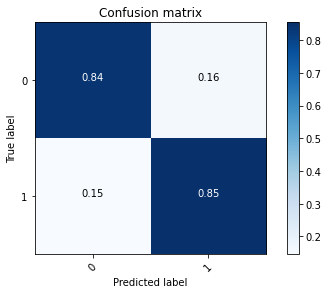

In [170]:
a1 = df2['mj_freq']
b1 = df2['mj_freq_month']
cnf_matrix_rf = confusion_matrix(b1, a1, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(b1, a1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=['0','1'],normalize= True,  title='Confusion matrix')
plt.savefig('rf_mj_88.png', bbox_inches='tight')

85% accurate at predicting chronic marijuana use

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5025
           1       0.05      0.95      0.09        22

    accuracy                           0.92      5047
   macro avg       0.52      0.94      0.53      5047
weighted avg       1.00      0.92      0.95      5047

Normalized confusion matrix
[[0.92 0.08]
 [0.05 0.95]]


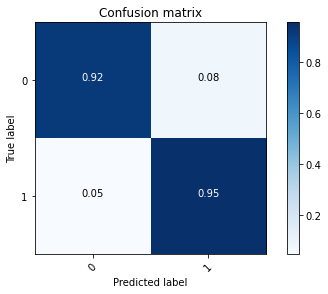

In [171]:
a2 = df2['drug_freq']
b2 = df2['drug_freq_month']
cnf_matrix_rf = confusion_matrix(b2, a2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(b2, a2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=['0','1'],normalize= True,  title='Confusion matrix')
plt.savefig('abc_drug_88.png', bbox_inches='tight')

95% accurate at predicting chronic cocaine use

## Preparing for Export to STATA

In [140]:
df2.columns

Index(['welfare', 'f_health', 'm_health', 'id', 'live_14', 'memp', 'femp',
       'meduc', 'num_oldsib', 'age_oldsib', 'educ', 'eth', 'sex', 'esteem',
       'crime', 'weight', 'afqt', 'religious', 'm_sex_age1st', 'f_sex_age1st',
       'alc_age1st', 'alc_gt6_last30', 'alc_last30', 'alcoholics1', 'alc_rel1',
       'alc_rel1_yrs', 'alcoholics2', 'alc_rel2', 'alc_rel2_yrs', 'mj_life',
       'mj_recent', 'mj_last30', 'coke_life', 'coke_recent', 'coke_last30',
       'wages_r', 'wages_s', 'others_present?', 'famsize', 'totinc', 'region',
       'married', 'age', 'emp', 'hours', 'urban', 'smsa', 'numchild', 'cesd',
       'smoke_age1st', 'weeks_79', '%weeks_79', 'weeks_80', '%weeks_80',
       'weeks_81', '%weeks_81', 'weeks_82', '%weeks_82', 'weeks_83',
       '%weeks_83', 'weeks_84', '%weeks_84', 'weeks_85', '%weeks_85',
       'weeks_86', '%weeks_86', 'weeks_87', '%weeks_87', 'weeks_88',
       '%weeks_88', 'missing_noninc', 'nonlinc', 'alc_rel1_1st',
       'alc_rel1_2nd', 'alc_rel2_1

One-hot encoding region variable

In [141]:
df2['northeast'] = np.where(df2['region']==1,1,0)
df2['northcentral'] = np.where(df2['region']==2,1,0)
df2['south'] = np.where(df2['region']==3,1,0)
df2['west'] = np.where(df2['region']==4,1,0)

In [142]:
df2.describe()

,welfare,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem,crime,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,others_present?,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,weeks_79,%weeks_79,weeks_80,%weeks_80,weeks_81,%weeks_81,weeks_82,%weeks_82,weeks_83,%weeks_83,weeks_84,%weeks_84,weeks_85,%weeks_85,weeks_86,%weeks_86,weeks_87,%weeks_87,weeks_88,%weeks_88,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,mj_year,drug_year,missing_smoke_age1st,missing_cesd,telint,else_present,msa,male,ethblack,ethhisp,ethother,alc_gt6_freq,cesd_mod,cesd_freq,height,mj_freq,drug_freq,mj_freq_month,drug_freq_month,northeast,northcentral,south,west
count,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.00000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.00000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.00000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.00000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000
mean,480.385774,0.372697,0.351694,5702.734892,18.784823,0.533188,0.772934,10.997622,2.085199,18.638795,10.498514,2.475134,1.548246,23.663959,0.090549,143.942144,45140.121260,2.961759,6.222905,7.926491,13.460670,0.849019,4.886467,0.504062,3.543095,2.721022,0.247474,2.511591,0.654844,1.867446,6.197543,0.306717,0.624331,7.213989,0.043392,13606.198138,8421.331880,0.252427,2.880325,27461.826630,2.642956,1.778086,27.048147,0.798296,1678.282148,0.770755,1.378839,0.934020,-0.514761,5.030909,23.667129,3.320388,24.245492,1.019219,28.55637,0.231028,30.796711,0.319992,31.324747,0.197543,34.296810,0.068159,36.417278,0.052308,40.395681,0.142659,46.038042,0.348128,50.370715,0.17020,0.014068,13855.628492,0.296017,0.208044,0.096295,0.151179,2.609471,0.58510,0.729542,0.206657,0.091341,0.176937,0.176937,0.036854,0.178720,0.76699,0.451754,0.233208,0.145829,0.620963,0.031306,0.214979,0.034080,66.796513,0.197939,0.084208,0.053101,0.004359,0.147018,0.254409,0.407173,0.191401
std,2941.766365,0.483570,0.477546,3410.752868,14.989125,0.498947,0.418977,3.067285,2.145951,11.654072,2.012138,0.735627,0.497716,4.070964,0.286995,29.984297,28902.725524,1.641443,7.954117,8.709016,7.207088,1.475453,6.769987,0.500033,5.569764,5.723189,0.431587,5.067540,2.853635,1.832044,2.183154,1.039376,1.211954,1.588510,0.316509,11216.706774,12803.129219,0.512315,1.573646,19835.784066,0.952145,0.661113,2.247000,0.401312,903.248950,0.420389,0.990008,1.133309,2.199820,9.126703,24.717503,14.497467,19.971952,7.731231,20.57362,2.187442,20.563029,5.015517,20.410738,3.817789,20.368257,2.264713,19.795392,1.819337,20.617599,3.610310,22.526079,5.278929,23.187484,3.27631,0.117782,16370.927844,0.456544,0.405949,0.295024,0.358259,5.673423,2.77785,0.444240,0.404948,0.288123,0.381653,0.381653,0.188421,0.383156,0.42279,0.497716,0.422915,0.352970

Defining frequent religious attenders

In [143]:
df2['religion_freq1'] = np.where(df2['religious']>3,1,0)
df2['religion_freq2'] = np.where(df2['religious']>4,1,0)

Defining total experience in weeks from 1979 if over the age of 16 in 1979

In [144]:
def experience(c):
    totexp = 0
    label1 = 'weeks_'
    label2 = '%weeks_'
    for x in range(79,89):
        a = "".join([label1,str(x)])
        b = "".join([label2,str(x)])
        exp = c[a]
        loss = c[b]
        net = exp - ((loss/100)*exp)
        totexp += net
    return totexp

df2['exp'] = df2.apply(experience, axis=1)
        
    

In [145]:
df2[['exp']].describe()

,exp
count,5047.000000
mean,344.402570
std,145.194429
min,0.000000
25%,248.735000
50%,367.000000
75%,461.000000
max,571.000000


Dropping some redundant columns

In [146]:
df2.drop(columns=['others_present?','weeks_79','%weeks_79',
                'weeks_80','%weeks_80','weeks_81','%weeks_81','weeks_82','%weeks_82','weeks_83','%weeks_83','weeks_84','%weeks_84','weeks_85',
                '%weeks_85','weeks_86','%weeks_86','weeks_87','%weeks_87','weeks_88','%weeks_88'], inplace=True)

In [147]:
def lwages(c):
    if c['wages_r'] != 0:
        return np.log(c['wages_r'])
    
df2['lwages'] = df2.apply(lwages, axis=1)

In [148]:

df2['expsq'] = df2['exp']**2
df2['agesq'] = df2['age']**2

Exporting to STATA .dta file

In [149]:
df2.to_stata('C:\\Users\\adnaa\\Documents\\unistuff\\Year 3\\econ\\Economics Extended Essay\\resources\\df2_2.dta')

In [150]:
for x in ['mj_freq','drug_freq','drug_year']:
    X1_col.append(x)

In [151]:
df1[X1_col].describe().T[['min','mean','std','max']].to_csv('C:\\Users\\adnaa\\Documents\\unistuff\\Year 3\\econ\\Economics Extended Essay\\resources\\df1_ds.csv')

In [152]:
df2[X1_col].describe().T[['min','mean','std','max']].to_csv('C:\\Users\\adnaa\\Documents\\unistuff\\Year 3\\econ\\Economics Extended Essay\\resources\\df2_mlds.csv')

In [153]:
df2_m = df2.loc[df2['male']==1]
df2_f = df2.loc[df2['male']==0]

In [154]:
df1.describe()

,welfare,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,age_80,esteem,mj_year_80,drug_year_80,crime,wages_r_80,wages_s_80,other_person_80,parent_present,friend_present,hm_present,misc_present,urban_80,smsa_80,famsize_80,married_80,region_80,totinc_80,emp_80,hours_80,weight,afqt,religious,alc_gt6_80,m_sex_age1st,f_sex_age1st,alc_age1st,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,cesd,smoke_age1st,mj_freq,drug_freq,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,missing_cesd,missing_smoke_age1st,mj_year,drug_year,alc_gt6_freq,cesd_mod,cesd_freq,height
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,259.636577,0.352579,0.345838,5821.331770,18.123974,0.514947,0.800996,11.072098,2.004396,19.434056,11.548945,2.490328,1.562134,20.033998,22.858441,2.105510,0.712485,0.100821,3857.036928,1507.455744,0.425557,0.166178,0.528722,0.209261,0.105510,0.787808,1.369578,3.736811,0.283998,2.549824,18219.401817,0.619871,1069.139508,147.082356,46003.960141,2.822685,1.073857,6.507620,8.815944,14.189332,0.504689,3.575909,2.773447,0.245018,2.458382,0.654748,-0.678781,4.729484,0.182298,0.019637,0.002931,14364.930832,0.298945,0.205744,0.103458,0.141559,2.684642,0.609613,0.750879,0.208382,0.208382,0.515533,0.224502,0.041618,0.203400,0.035756,66.851700
std,1275.843063,0.477843,0.475710,3439.063956,14.425016,0.499850,0.399309,3.194206,2.070647,12.027772,1.704911,0.733397,0.496197,1.491897,4.034541,2.439657,1.526944,0.301135,4079.635866,4164.483692,0.494500,0.372295,0.882114,0.764307,0.641115,0.408920,1.084655,2.192553,0.591597,0.981585,14867.189193,0.485489,810.881894,31.207451,29340.066697,1.601242,1.596628,8.092778,8.882477,6.953835,0.500051,5.622580,5.840594,0.430161,5.039367,2.863825,2.330878,9.155027,0.386146,0.138768,0.054066,14463.584889,0.457863,0.404304,0.304601,0.348649,5.822818,2.847229,0.432567,0.406211,0.406211,0.499832,0.417315,0.199744,0.402586,0.185709,4.013279
min,0.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,18.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
25%,0.000000,0.000000,0.000000,2895.250000,11.000000,0.000000,1.000000,10.000000,1.000000,18.000000,11.000000,2.000000,1.000000,19.000000,20.000000,0.000000,0.000000,0.000000,796.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,7000.000000,0.000000,390.000000,125.000000,19886.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3413.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [155]:
df2_m.describe()

,welfare,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem,crime,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,mj_year,drug_year,missing_smoke_age1st,missing_cesd,telint,else_present,msa,male,ethblack,ethhisp,ethother,alc_gt6_freq,cesd_mod,cesd_freq,height,mj_freq,drug_freq,mj_freq_month,drug_freq_month,northeast,northcentral,south,west,religion_freq1,religion_freq2,exp,lwages,expsq,agesq
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.0,2280.000000,2280.00000,2280.000000,2280.000000,2280.000000,2280.000000,2280.0,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.00000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.0,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2127.000000,2280.000000,2280.000000
mean,167.616667,0.330702,0.307018,5726.608772,18.360526,0.533333,0.780702,11.107018,2.055263,18.425877,10.361842,2.482018,1.0,23.872807,0.15000,161.845175,46151.961842,2.795175,13.775000,0.0,14.465789,1.321053,6.931579,0.469737,3.464912,2.215351,0.204825,2.085088,0.600439,2.224561,5.814474,0.41886,0.792544,6.996491,0.062281,17557.792105,4779.621053,2.672807,28272.839474,2.627632,1.685088,26.960088,0.893421,1990.560965,0.772368,1.391667,0.662719,-0.577193,5.191667,0.017544,10715.047368,0.248246,0.221491,0.069737,0.135088,2.113596,0.525877,0.742982,0.268421,0.121930,0.173246,0.173246,0.049561,0.208333,0.764912,1.0,0.225000,0.146491,0.628509,0.055263,0.177193,0.023684,69.904825,0.265351,0.116667,0.075877,0.008772,0.153947,0.260965,0.388596,0.196491,0.330263,0.218860,376.025632,9.593409,157743.242891,731.883772
std,1358.380144,0.470569,0.461358,3474.136733,14.661003,0.498997,0.413862,3.094241,2.116924,11.610232,2.032910,0.736816,0.0,4.065454,0.35715,27.163865,30101.158255,1.612444,6.000643,0.0,6.017064,1.737614,7.919885,0.499193,5.439894,5.272948,0.403662,4.664877,2.855063,1.912411,2.340153,1.20059,1.352824,1.754574,0.411099,11813.242679,8181.017290,1.576472,20246.338275,0.966953,0.648315,2.244917,0.308645,800.670862,0.419396,1.005741,1.001454,2.124309,9.236763,0.131315,15395.193789,0.432090,0.415341,0.254759,0.341892,5.217666,2.752674,0.437085,0.443235,0.327277,0.378542,0.378542,0.217085,0.406206,0.424147,0.0,0.417674,0.353676,0.483309,0.228543,0.381916,0.152097,3.069357,0.441617,0.321093,0.264860,0.093267,0.360977,0.439257,0.487538,0.397431,0.470411,0.413564,127.887218,0.863277,87607.760148,121.851866
min,0.000000,0.000000,0.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,10.000000,0.00000,80.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [156]:
df2_f.describe()

,welfare,f_health,m_health,id,live_14,memp,femp,meduc,num_oldsib,age_oldsib,educ,eth,sex,esteem,crime,weight,afqt,religious,m_sex_age1st,f_sex_age1st,alc_age1st,alc_gt6_last30,alc_last30,alcoholics1,alc_rel1,alc_rel1_yrs,alcoholics2,alc_rel2,alc_rel2_yrs,mj_life,mj_recent,mj_last30,coke_life,coke_recent,coke_last30,wages_r,wages_s,famsize,totinc,region,married,age,emp,hours,urban,smsa,numchild,cesd,smoke_age1st,missing_noninc,nonlinc,alc_rel1_1st,alc_rel1_2nd,alc_rel2_1st,alc_rel2_2nd,years_alcrel1,years_alcrel2,live_parents,mj_year,drug_year,missing_smoke_age1st,missing_cesd,telint,else_present,msa,male,ethblack,ethhisp,ethother,alc_gt6_freq,cesd_mod,cesd_freq,height,mj_freq,drug_freq,mj_freq_month,drug_freq_month,northeast,northcentral,south,west,religion_freq1,religion_freq2,exp,lwages,expsq,agesq
count,2767.000000,2767.00000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.0,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.0,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.0,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2229.000000,2767.000000,2767.000000
mean,738.106614,0.40730,0.388507,5683.062884,19.134442,0.533068,0.766534,10.907481,2.109866,18.814239,10.611131,2.469462,2.0,23.491868,0.041561,129.190098,44306.367546,3.099024,0.0,14.457897,12.632454,0.460065,3.201301,0.532346,3.607517,3.137694,0.282617,2.863029,0.699675,1.573184,6.513191,0.214312,0.485725,7.393206,0.027828,10350.096133,11422.091073,3.051319,26793.554391,2.655584,1.854716,27.120708,0.719913,1420.965305,0.769425,1.368269,1.157571,-0.463318,4.898446,0.011203,16443.458258,0.335381,0.196964,0.118179,0.164438,3.018070,0.633900,0.718468,0.155764,0.066137,0.179978,0.179978,0.026382,0.154319,0.768703,0.0,0.239971,0.145284,0.614745,0.011565,0.246115,0.042645,64.235273,0.142392,0.057463,0.034333,0.000723,0.141308,0.249006,0.422479,0.187206,0.413083,0.275750,318.345258,9.090872,124814.864612,740.577882
std,3757.662840,0.49142,0.487499,3358.128482,15.247962,0.498995,0.423113,3.042499,2.169649,11.689254,1.988177,0.734731,0.0,4.068181,0.199620,23.458121,27854.408827,1.652675,0.0,6.625911,7.962929,1.071780,5.063904,0.499043,5.674713,6.038337,0.450353,5.352069,2.852193,1.708188,1.990512,0.874213,1.062607,1.412703,0.207294,9542.702067,14965.089841,1.550863,19469.286102,0.939756,0.661840,2.246527,0.449123,901.967383,0.421277,0.976909,1.185795,2.259232,9.034530,0.105271,16697.685906,0.472209,0.397777,0.322878,0.370740,5.993281,2.797979,0.449828,0.362697,0.248566,0.384239,0.384239,0.160299,0.361319,0.421738,0.0,0.427143,0.352450,0.486743,0.106936,0.430824,0.202093,2.642732,0.349515,0.232767,0.182117,0.026880,0.348402,0.432516,0.494043,0.390148,0.492476,0.446972,153.230698,1.077748,91255.788958,122.215779
min,0.000000,0.00000,0.000000,75.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,9.000000,0.000000,70.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [157]:
df2_m[['mj_year','drug_year','mj_freq','drug_freq','emp', 'lwages', 'memp', 'femp', 'meduc', 'educ','afqt', 'age', 'agesq', 'exp', 'expsq', 'missing_noninc', 
     'nonlinc', 'telint', 'else_present', 'urban', 'msa', 'ethblack', 'ethhisp', 'religion_freq1']].describe().T[['min','mean','std','max']].to_csv('C:\\Users\\adnaa\\Documents\\unistuff\\Year 3\\econ\\Economics Extended Essay\\resources\\df2m_ds.csv')
df2_f[['mj_year','drug_year','mj_freq','drug_freq','emp', 'lwages', 'memp', 'femp', 'meduc', 'educ','afqt', 'age', 'agesq', 'exp', 'expsq', 'missing_noninc', 
     'nonlinc', 'telint', 'else_present', 'urban', 'msa', 'ethblack', 'ethhisp', 'religion_freq1']].describe().T[['min','mean','std','max']].to_csv('C:\\Users\\adnaa\\Documents\\unistuff\\Year 3\\econ\\Economics Extended Essay\\resources\\df2f_ds.csv')